## Cilia classifier tests
This notebook will be used for testing the classifier on the dataset it was trained and on other datasets.

In [1]:
import matplotlib.pyplot as plt
from morphocilia.io import load_rescaled_channel
import napari
import numpy as np
import pandas as pd
import joblib

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv("D:/estela/src/cilia_quantification.csv")
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median,classes
0,1,719.0,18.294934,8.525367,174.0,0.896509,12.0,NaN
1,2,834.0,21.121715,8.043381,126.0,0.875131,12.0,NaN
2,3,749.0,17.807669,8.183166,133.0,0.858945,11.0,NaN
3,4,584.0,22.366502,6.900171,125.0,0.732748,12.0,NaN
4,5,457.0,20.177920,4.147177,67.0,0.887379,11.0,NaN
...,...,...,...,...,...,...,...,...
415,416,941.0,21.670160,8.111516,110.0,0.888574,14.0,NaN
416,417,500.0,14.569206,7.973495,153.0,0.904159,13.0,NaN
417,418,728.0,19.896112,7.929379,200.0,0.864608,13.0,NaN
418,419,937.0,21.872716,8.837211,180.0,0.893232,16.0,NaN


In [3]:
scaler = joblib.load("D:/estela/results/20240410/scaler.sca")
cilia_classifier = joblib.load("D:/estela/results/20240410/cilia_classifier.ml")

In [4]:
X = df[["solidity", "axis_minor_length"]]

scaled_features = scaler.transform(X)
scaled_features_df = pd.DataFrame(
    scaled_features, index=X.index, columns=X.columns
)

In [5]:
def get_color(kind):
    if kind == "elongated":
        return 1
    elif kind == "fibroblastic":
        return 2
    elif kind == "looped":
        return 3
    else:
        return 4

In [6]:
classification = cilia_classifier.predict(scaled_features_df)

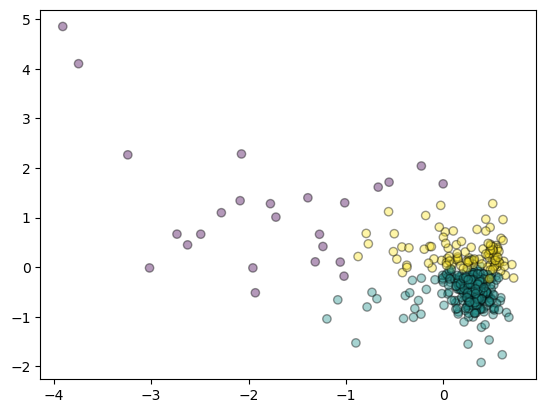

In [7]:
scatter = plt.scatter(
    scaled_features_df["solidity"],
    scaled_features_df["axis_minor_length"],
    c=list(map(get_color, classification)),
    edgecolors="k",
    alpha=0.4,
)

To visualise the classification in the cilia image, Napari will be used.

In [37]:
num_classification = []

In [38]:
for kind in classification:
    number = get_color(kind)
    num_classification.append(number)

In [40]:
df["classes"] = num_classification

In [42]:
df.to_csv("cilia_classification.csv", index=False)

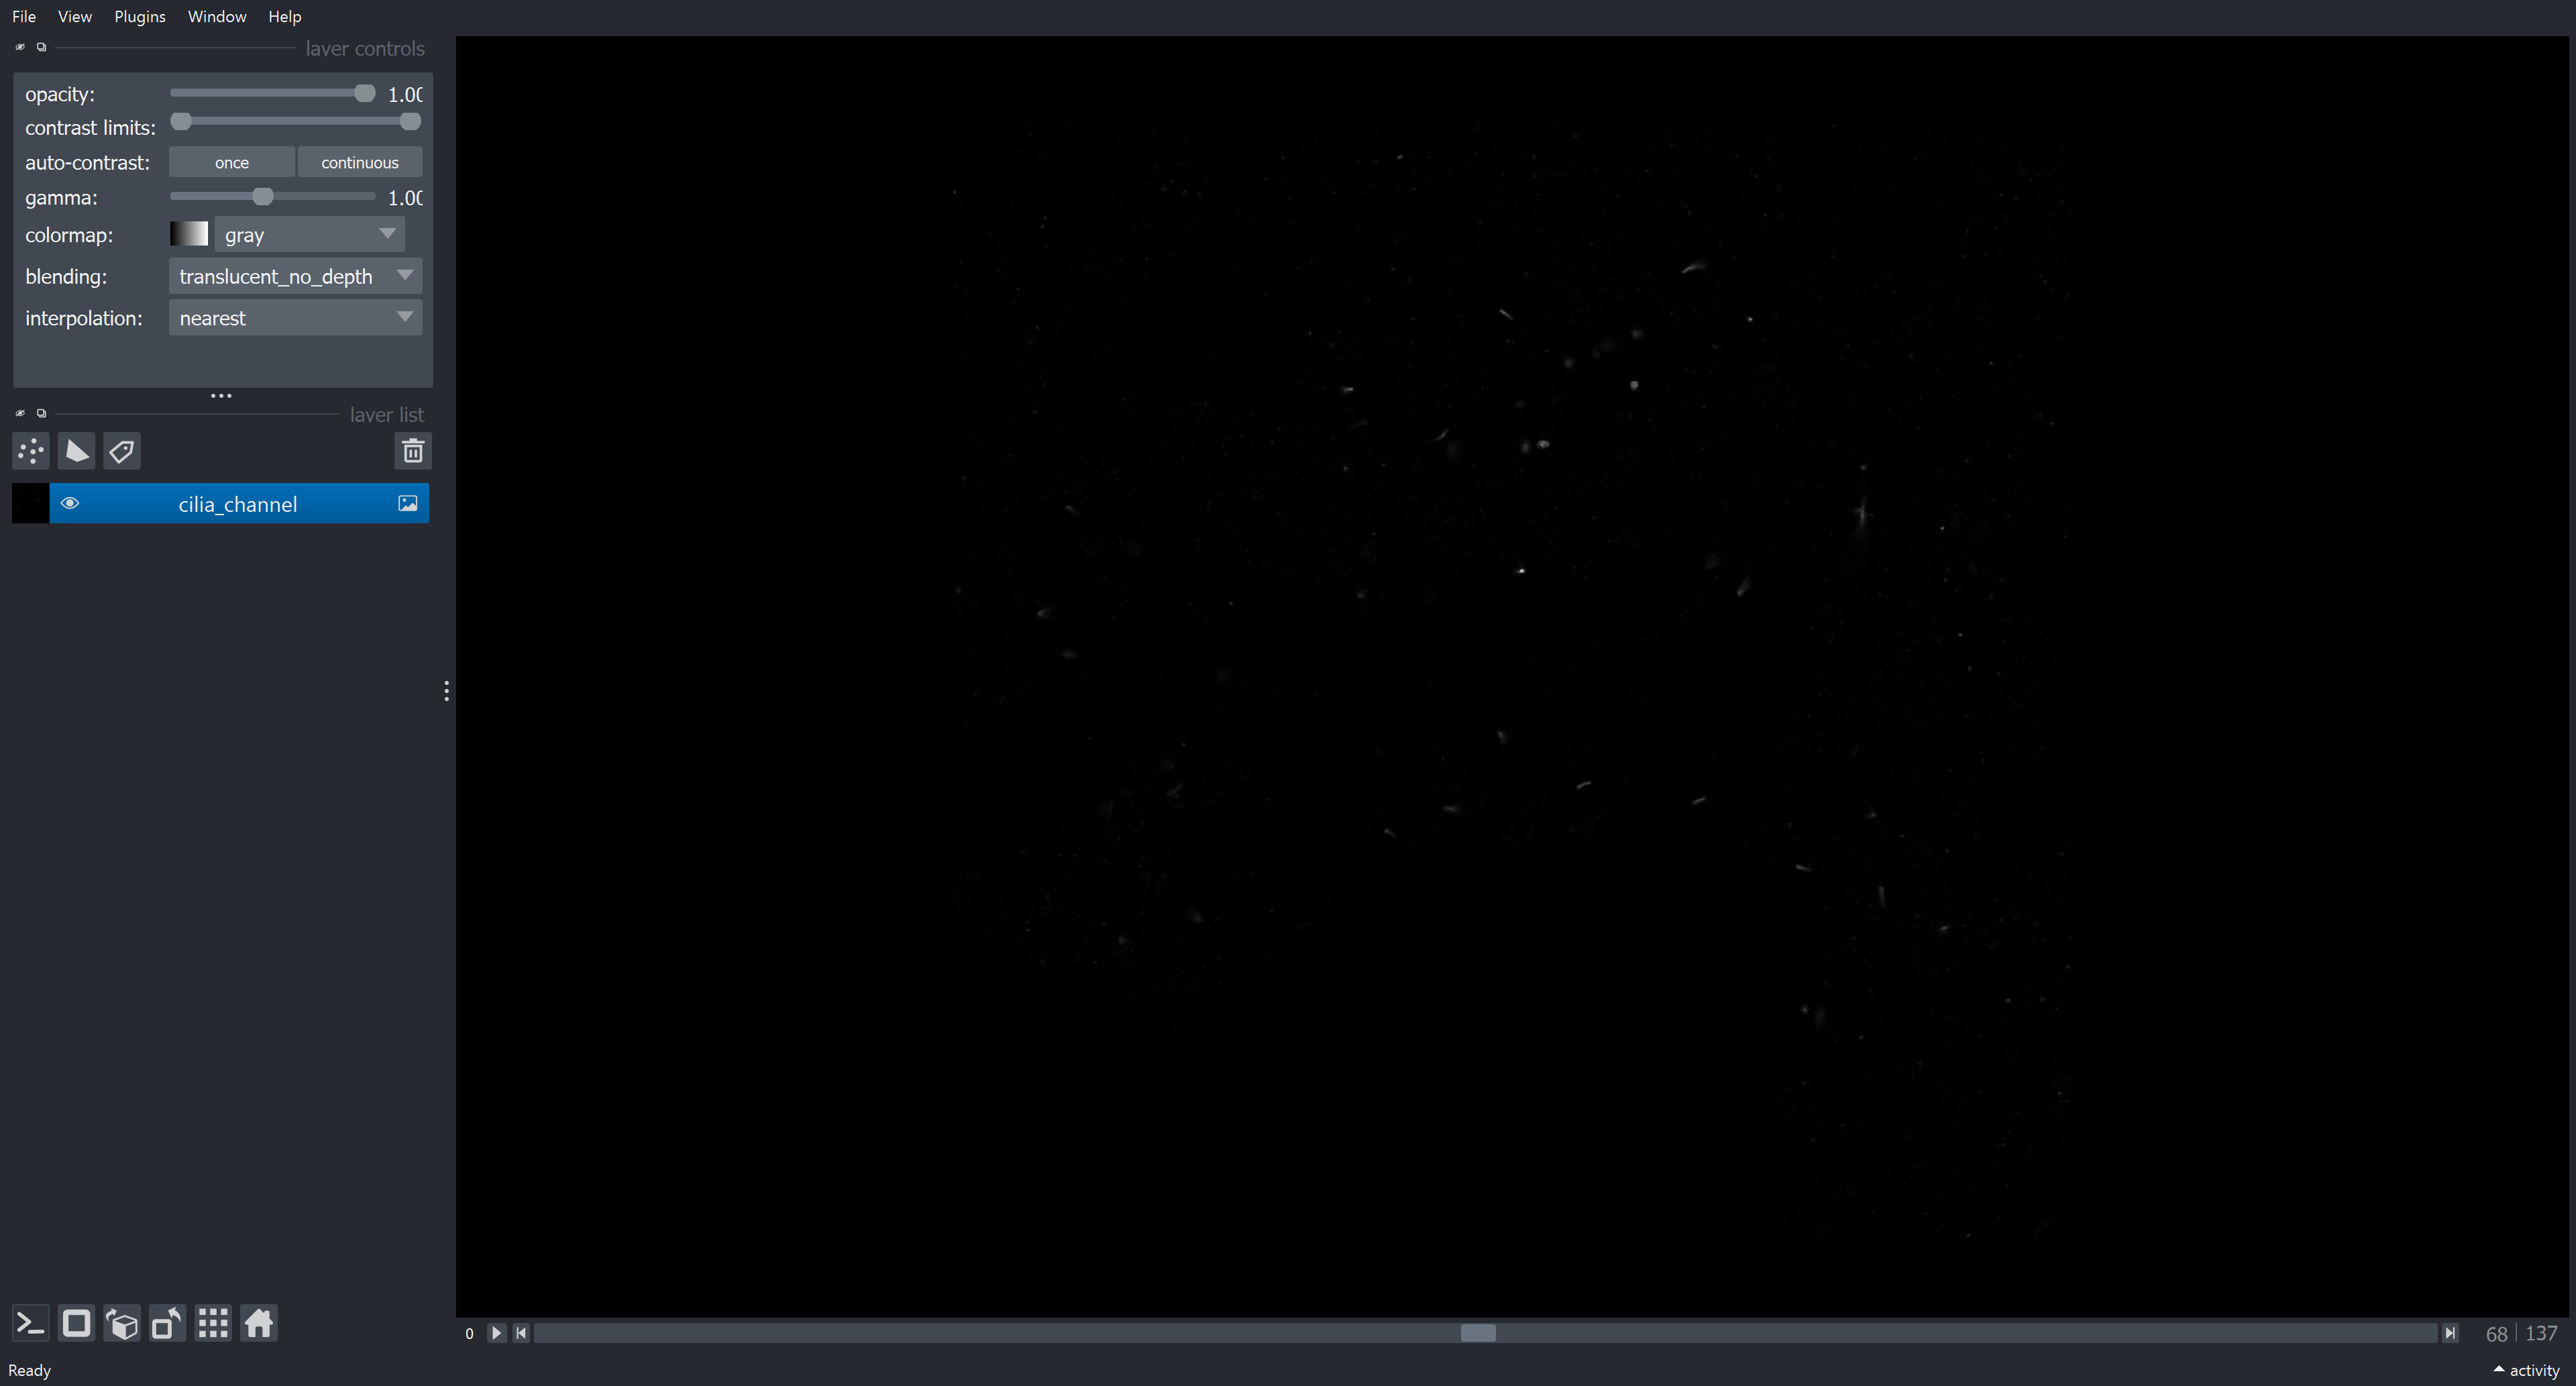

In [15]:
cilia_channel = load_rescaled_channel(
    "D:/estela/data/microscopy/leica_stellaris/20231025_p1_cd13_opn_arl13b/20231025_p1_cd13_opn_arl13b.lif",
    5,
    1,
)

viewer = napari.Viewer()
viewer.add_image(cilia_channel, scale=(0.3, 0.144, 0.144))
napari.utils.nbscreenshot(viewer)